# Dangerous Mushrooms! Can you tell the difference?

![mushroom](./mushroom3.jpg)

## Introduction
##### Mushrooms are incredibly popular across cultures and continents and that popularity is only growing. It is estimated that in 2027 the global mushroom market will surpass 86 billion dollars. 

## Problem Statement
##### Hunting mushrooms is an extremely popular activity with avid hunters braving the outdoors after seasonal rains to find these delicious gems. Unfortunately according to an article published by NPR in May of 2023, an estimate 10,000 people fall ill due to mushroom poisoning each year and 100 will die. This is often a result of miss identifcation of mushrooms that are safe vs. mushrooms that are dangerous, often these can look very similar at first glance. 

## Research questions
##### Can we consistently, easily, and with a high degree of accuracy classify poisonous vs. safe mushroom varieties?

## Methodology
##### For our research we will use the 'Mushroom Classification' dataset on Kaggle. This dataset contains 23 columns including 22 observable mushroom characteristic columns and one binary classification column (poinsonous vs. edible). Our objective and approach is twofold we would like to achive a surefire method to classify mushroom safety using all available feature data and a machine learning model. We would also like to build a practical tool that can be used by mushroom hunters in the field to quickly and easily identify safe mushrooms. 
##### For our high degree of accuracy model we will build and tune a random forest classifier. We used this model to determine a short list of high importance features that were simultaneously the least ambiguous and most eaily measured for a hunter.
![feat_imp](./feat_imp.jpg)
##### For our field guild we will build a decision tree that is easy for hunters to follow when they do not have easy access to a computer. We selected the following 3 three features based on a combination of easy of determination and high importance. 
![df2_head](./df2_head.jpg)

## Results 
##### Using a simple decision tree paired with tuning of hyperparameters we were able to achive a 100% safe output (no type II errors) while only miss-classifying 3% of the safe mushrooms as un-safe. Based on this output we believe that this simple decision tree could be used as a basic printout in the field to quickly, safely, and accurately classify mushrooms. Because of our extrememly high model performance, both for our random forest and for our decision tree, we had some concerns about potential leakage. But after examining the data, all features included should be easily available for any mushroom that is picked and therefore valid for classification use. 
![conf_plot](./conf_plot.jpg)

## Discussions and Implications
##### Based on our results we believe that machine learning classification is extremely promising in the mushroom arena. Continuing to expand upon tools like this could result in less sickness and less lives lost. Using something very similar to the decision tree shown below a mushroom hunter should be able to ask a series of 3-5 questions and have nearly 100% confidence that they mushroom they are picking is safe. 
![tree_plot](./tree_plot.jpg)

## Conclusion
##### Extremely high accuracy was achieved within our test dataset. While this result is encouraging, the stakes are extremely high when miss-classification can result in sickness or death. As a result we believe our model is a good place to start but would need expanded testing before pratical use.
##### For our field model decision tree we would envision this being something that could be printed on a note card or in a book. Decently high extremely high accuracy was achieved. One feature that was not included in our dataset was location. We believe next steps should explore location specific mushroom data that may improve accuracy in the simplified version of our classifier.

## References
##### Klose, S. L. (2022, September 1). Mushrooms are having their moment. Produce Business. https://www.producebusiness.com/mushrooms-are-having-their-moment/ 
##### Barnhart, M. (2023, May 17). New hope for an antidote to death cap mushrooms and other poison fungi. NPR. https://www.npr.org/sections/goatsandsoda/2023/05/17/1175494500/new-hope-for-an-antidote-to-death-cap-mushrooms-and-other-poison-fungi 
##### Kaggle Datasource: https://www.kaggle.com/datasets/uciml/mushroom-classification
## Appendix
##### Corey Cassell - https://www.linkedin.com/in/corey-cassell/
##### Justus Eaglesmith - https://www.linkedin.com/in/justus-eaglesmith-0ab540167/
##### Jack Bergstrom - https://www.linkedin.com/in/john-bergstrom-v/

# Data Preparation and EDA

## Loading the Libraries

In [1]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


C:\Users\corey\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Step 1: Load the data

In [2]:
df = pd.read_csv('mushrooms.csv')
orig_df = df
# replace single letter definitions with the full names
def replace_column_values(df, column_name, value_mapping):
    df[column_name] = df[column_name].replace(value_mapping)
    return df

# Create a mapping for each column
column_mappings = {
    'class': {'e':'edible','p':'poisonous'},
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple',
                  'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none',
             'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange',
                   'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink',
                               'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink',
                               'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant',
                  's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange',
                          'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}

# Replace values in each column
for column, mapping in column_mappings.items():
    df = replace_column_values(df, column, mapping)

## Step 2: Overview of the dataset

In [3]:
print("Dataset Overview:")
print(df.head())
print(df.info())  # Display basic information about the dataset (e.g., data types, non-null counts)


Dataset Overview:
       class cap-shape cap-surface cap-color  bruises     odor  \
0  poisonous    convex      smooth     brown  bruises  pungent   
1     edible    convex      smooth    yellow  bruises   almond   
2     edible      bell      smooth     white  bruises    anise   
3  poisonous    convex       scaly     white  bruises  pungent   
4     edible    convex      smooth      gray       no     none   

  gill-attachment gill-spacing gill-size gill-color  ...  \
0            free        close    narrow      black  ...   
1            free        close     broad      black  ...   
2            free        close     broad      brown  ...   
3            free        close    narrow      brown  ...   
4            free      crowded     broad      black  ...   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                   smooth                  white                  white   
1                   smooth                  white                  white

## Step 3: Summary statistics

In [4]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
         class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count     8124      8124        8124      8124    8124  8124            8124   
unique       2         6           4        10       2     9               2   
top     edible    convex       scaly     brown      no  none            free   
freq      4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top           close     broad       buff  ...                   smooth   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9  

## Step 4: Explore variation in each column

In [5]:
for column in df.columns:
    print(f"\nColumn: {column}")
    print(f"Unique Values: {df[column].nunique()}")
    print(df[column].value_counts(normalize=True))  # Display proportions for unique values
#     We have a lot of classes with very rare observations.Consider consensing rare categories to prevent curse of dimensionality


Column: class
Unique Values: 2
edible       0.517971
poisonous    0.482029
Name: class, dtype: float64

Column: cap-shape
Unique Values: 6
convex     0.450025
flat       0.387986
knobbed    0.101920
bell       0.055638
sunken     0.003939
conical    0.000492
Name: cap-shape, dtype: float64

Column: cap-surface
Unique Values: 4
scaly      0.399311
smooth     0.314623
fibrous    0.285574
grooves    0.000492
Name: cap-surface, dtype: float64

Column: cap-color
Unique Values: 10
brown       0.281142
gray        0.226489
red         0.184638
yellow      0.131955
white       0.128016
buff        0.020679
pink        0.017725
cinnamon    0.005416
purple      0.001969
green       0.001969
Name: cap-color, dtype: float64

Column: bruises
Unique Values: 2
no         0.584441
bruises    0.415559
Name: bruises, dtype: float64

Column: odor
Unique Values: 9
none        0.434269
foul        0.265879
fishy       0.070901
spicy       0.070901
almond      0.049237
anise       0.049237
pungent     0.03

## Step 5: Visualizations for proportions

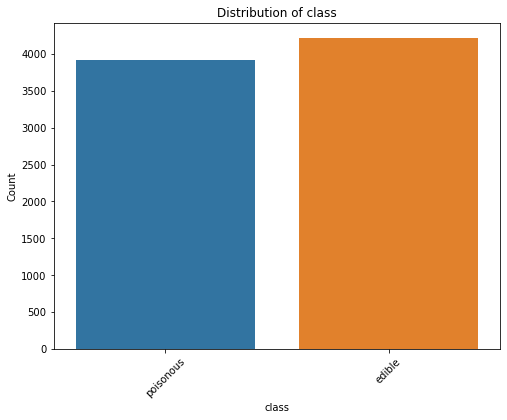

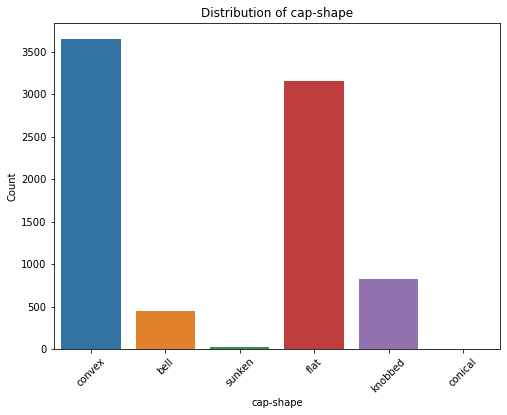

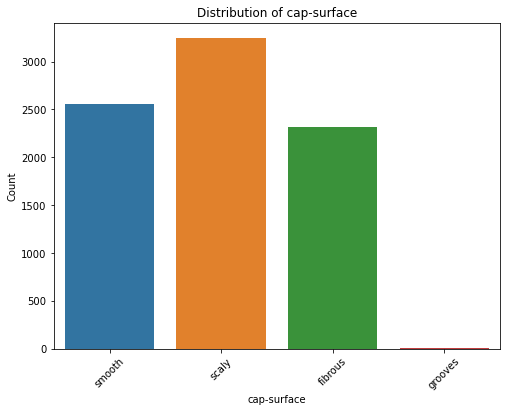

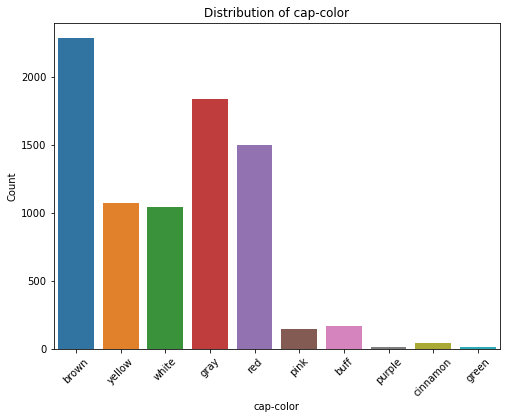

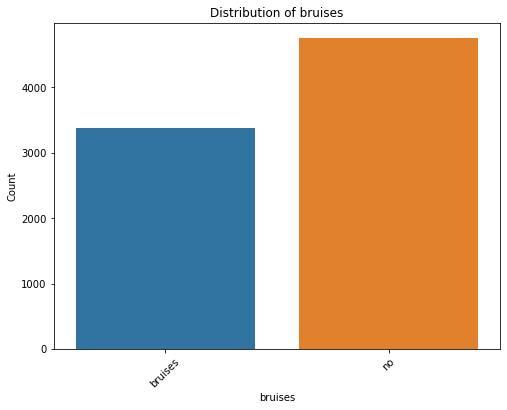

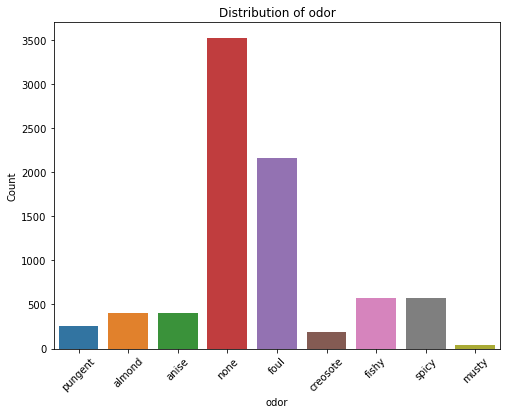

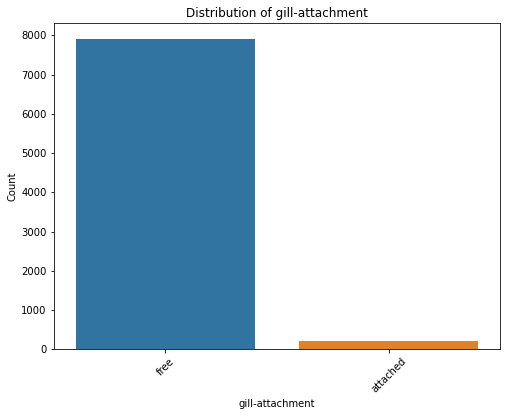

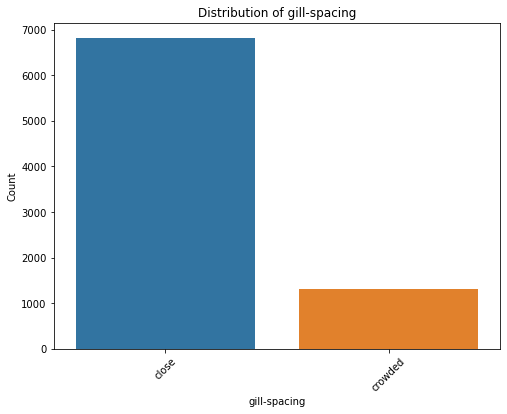

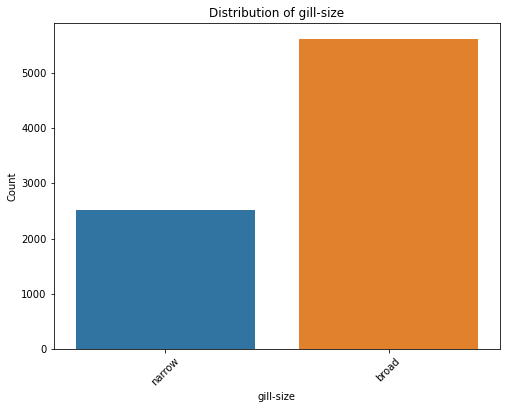

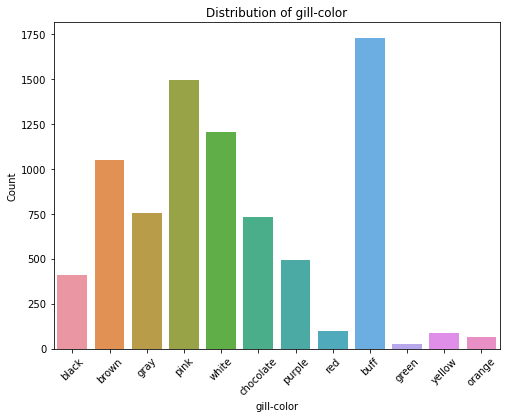

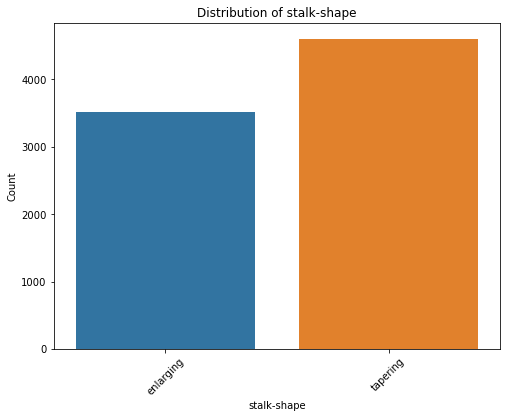

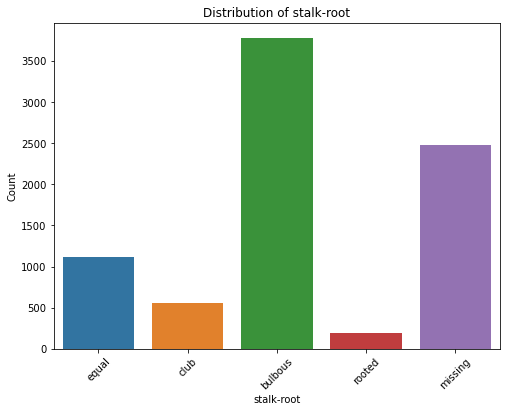

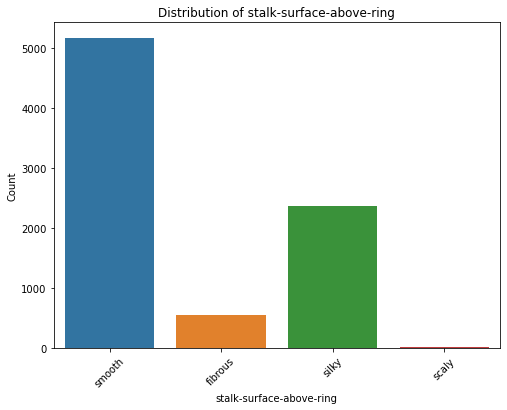

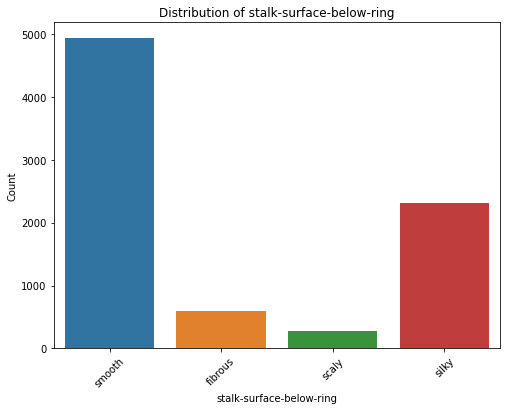

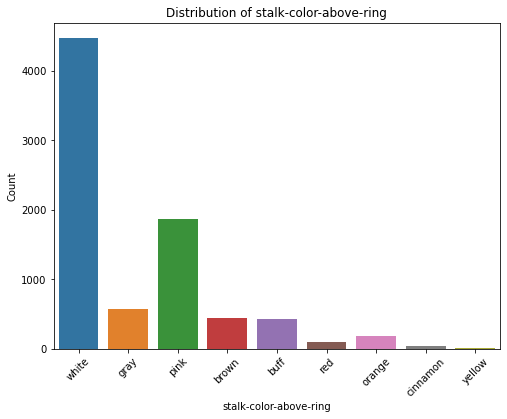

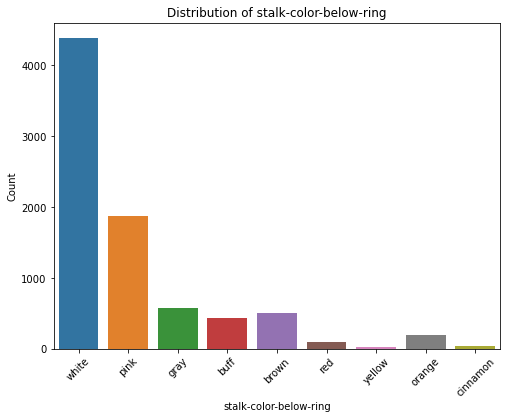

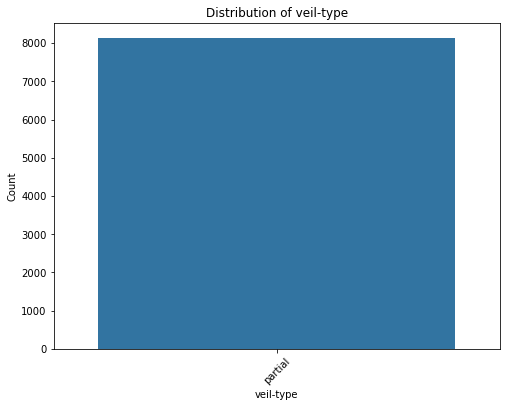

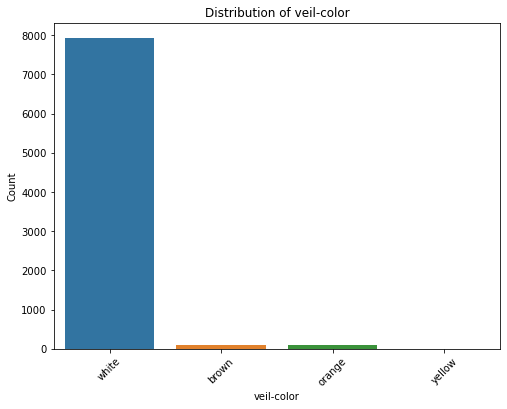

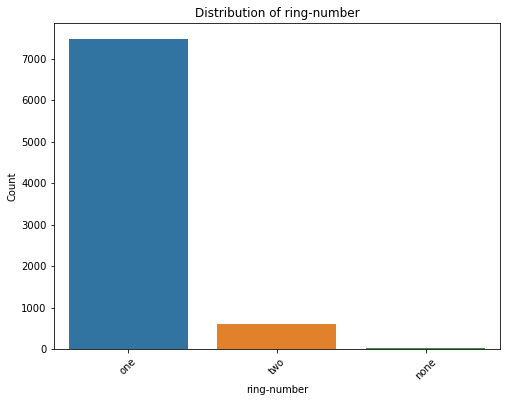

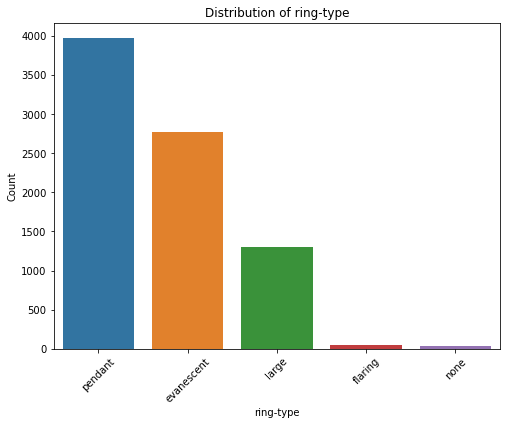

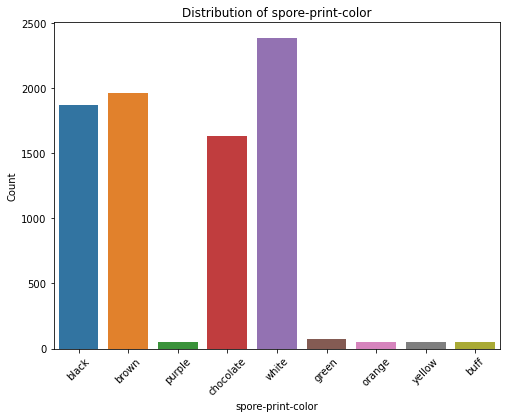

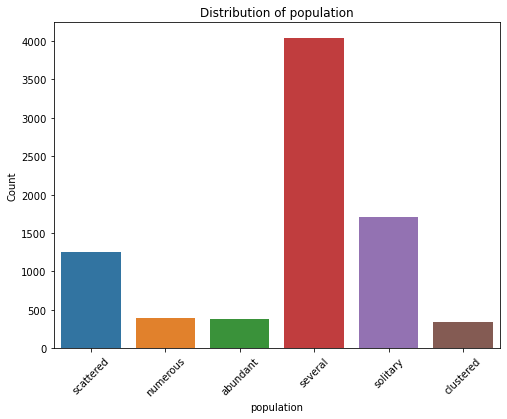

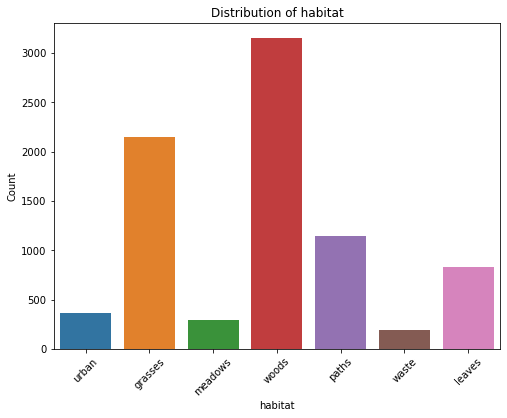

In [6]:
for column in df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=column, data=df)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

In [7]:
# Convert categorical features to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Perform hierarchical clustering
num_clusters = 2  # Specify the number of clusters you want
clustering = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = clustering.fit_predict(df)

# Add the cluster labels to the DataFrame
df['cluster'] = cluster_labels

# Print the cluster assignments
print("Cluster Assignments:")
print(df[['cluster']])

# If needed, you can also perform further analysis on each cluster.
# For example, you can calculate the mean or mode of each feature within each cluster.
cluster_means = df.groupby('cluster').mean()
cluster_modes = df.drop('cluster', axis=1).mode()

print("Cluster Means:")
print(cluster_means)

print("Cluster Modes:")
print(cluster_modes)


Cluster Assignments:
      cluster
0           0
1           0
2           0
3           0
4           0
...       ...
8119        0
8120        0
8121        0
8122        1
8123        0

[8124 rows x 1 columns]
Cluster Means:
            class  cap-shape  cap-surface  cap-color  bruises      odor  \
cluster                                                                   
0        0.342089   2.354597     1.538462   4.545966  0.47217  4.731082   
1        1.000000   3.000000     2.500000   3.500000  1.00000  5.000000   

         gill-attachment  gill-spacing  gill-size  gill-color  ...  \
cluster                                                        ...   
0               0.967167      0.205128   0.122577    5.466854  ...   
1               1.000000      0.000000   1.000000    2.000000  ...   

         stalk-surface-below-ring  stalk-color-above-ring  \
cluster                                                     
0                        2.404628                5.297061   
1     

In [8]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,cluster
0,1,2,3,0,0,7,1,0,1,0,...,7,7,0,2,1,4,0,3,4,0
1,0,2,3,9,0,0,1,0,0,0,...,7,7,0,2,1,4,1,2,0,0
2,0,0,3,8,0,1,1,0,0,1,...,7,7,0,2,1,4,1,2,2,0
3,1,2,2,8,0,7,1,0,1,1,...,7,7,0,2,1,4,0,3,4,0
4,0,2,3,3,1,6,1,1,0,0,...,7,7,0,2,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,3,0,1,6,0,0,0,11,...,4,4,0,1,1,4,2,1,1,0
8120,0,2,3,0,1,6,0,0,0,11,...,4,4,0,0,1,4,2,4,1,0
8121,0,3,3,0,1,6,0,0,0,1,...,4,4,0,1,1,4,2,1,1,0
8122,1,4,2,0,1,3,1,0,1,2,...,7,7,0,2,1,0,7,4,1,1


# 4.1 Random Forest
##### The confusion matrix output shows 100% accuracy, by far our best model performance. 

In [9]:
X = df.drop('class', axis=1)  
y = df['class']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

1.0


### Random forest feature importance
##### Graphing feature importance shows us which features capture the largest amount of classification variation. Odor, Spore Print Color, and Gill Size are the top three contributing features.

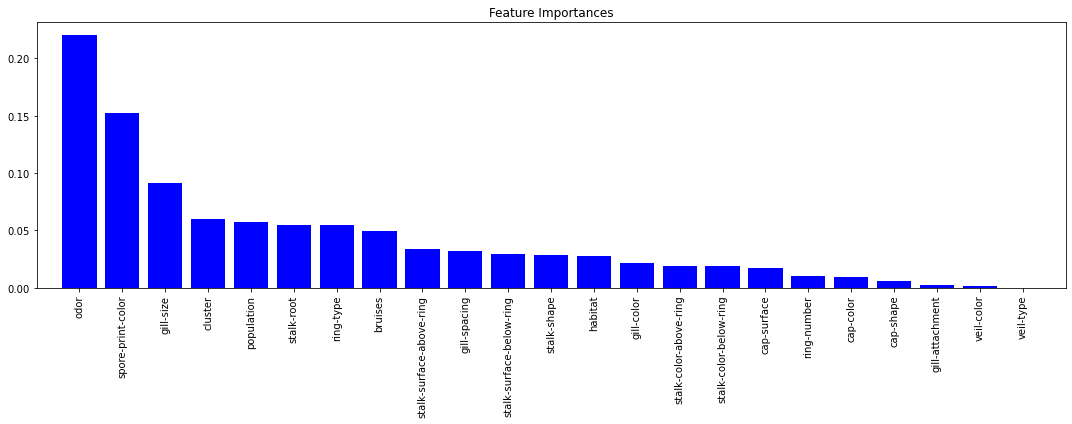

In [10]:
feature_importances = rfc.feature_importances_

indices = np.argsort(feature_importances)[::-1]
features = X.columns  

plt.figure(figsize=(15, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices],
       color="b", align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.tight_layout()  

plt.savefig('feat_imp.jpg', format='jpg', dpi=80)
plt.show()


## Looking for potential Data Leakage

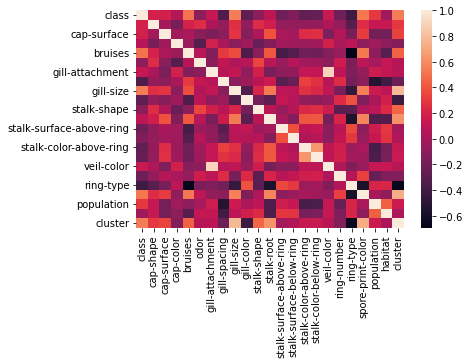

In [11]:
df.drop(columns= 'veil-type', inplace=True)
df_encoded = df.apply(LabelEncoder().fit_transform)
corr = df_encoded.corr()

sns.heatmap(corr)
plt.show()

# 4.2 support vector machine

In [12]:
svc = SVC(kernel='linear', random_state=42)

svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))
print(accuracy_score(y_test, y_pred_svc))

[[824  19]
 [ 15 767]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       843
           1       0.98      0.98      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

0.9790769230769231


# 4.3 clustering Kmeans

In [13]:
kmeans = KMeans(n_clusters=2, random_state=42)  

kmeans.fit(X)

cluster_assignments = kmeans.labels_

df['cluster'] = cluster_assignments

print(df['cluster'].value_counts())


1    4641
0    3483
Name: cluster, dtype: int64


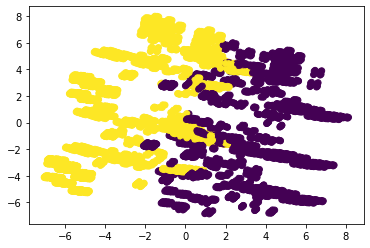

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_assignments, cmap='viridis')

plt.show()


# Bonus Classification Models, how many features are enough and wich features are easiest to assess?
##### Here we examine model output accuracy using only the top features (based on importance) and also based on pratcial easy of measurment. We want to use features that capture a high degree of varience and also are very easy for an individual to measure. We wanted to further refine our model for practical application and use in a field setting. Some features like 'smell' can have a high degree of variance in interpretability. We wanted to only use unambiguous easily measured variables like the size of gills or the color of the cap. 

In [15]:
selected_columns = ['class','spore-print-color','gill-size','ring-type']
df2 = df[selected_columns]
df2.head()


import dataframe_image as dfi

df2_head = df2.head()
dfi.export(df2_head, 'df2_head.jpg')

##### With Only Using 3 easily measurable features ('spore-print-color','gill-size','ring-type') we achieved 97% Accuracy in our random forest classifier

In [16]:
X = df2.drop('class', axis=1)  
y = df2['class']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[793  50]
 [  0 782]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       843
           1       0.94      1.00      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

0.9692307692307692


## Reducing Risk and Simplifying Field Identifcation

##### Visualizing the decision making process using a decision tree enables quick manual classification. Potentially a tool similar to this could be used as a field guide. Narrowing down potentially risky mushrooms to the hunting region may further improve accuracy in a simple model like this where there is also no room for error. 

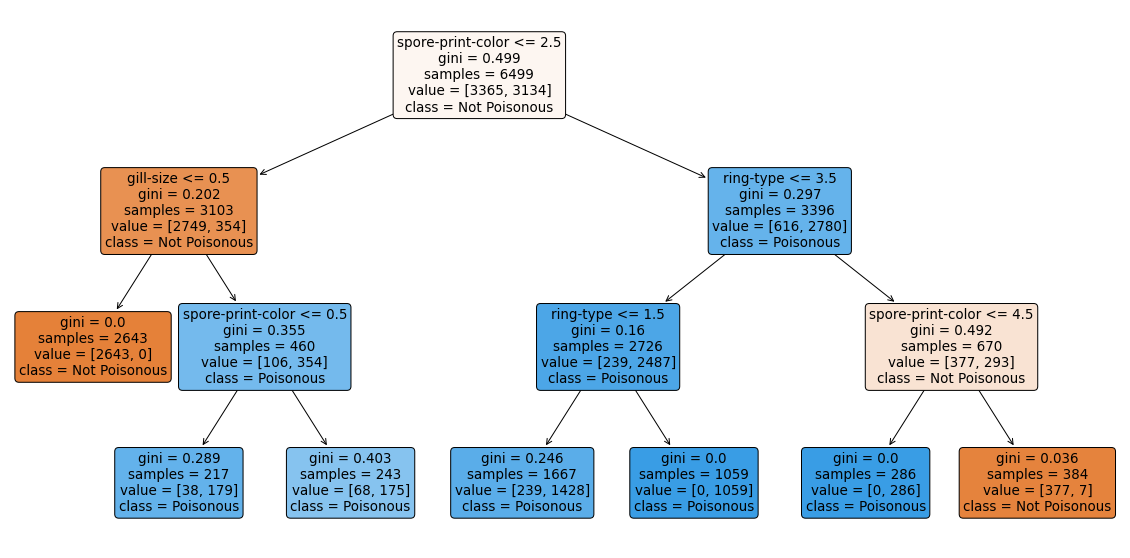

In [17]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=['Not Poisonous', 'Poisonous'], rounded=True)
plt.show()



##### Which Spore Print Colors Are Poisonous?

In [18]:
# Step 1: Load the data
reload_df = pd.read_csv("mushrooms.csv")
# Assuming df is the original DataFrame loaded from your data source
orig_df = reload_df.copy()
original_spore_colors = orig_df['spore-print-color'].unique()
encoded_spore_colors = orig_df['spore-print-color'].unique()
label_encoder.fit(original_spore_colors)
mapping = dict(zip(label_encoder.transform(original_spore_colors), original_spore_colors))
spore_colors_split = [mapping[i] for i in range(3)]  # 0, 1, 2 since <= 2.5
print("Non Poisonous Colors:", spore_colors_split)


Non Poisonous Colors: ['b', 'h', 'k']


In [19]:
# Which Spore Print Colors Are Poisonous?
original_spore_colors = orig_df['spore-print-color'].unique()
encoded_spore_colors = orig_df['spore-print-color'].unique()
label_encoder.fit(original_spore_colors)
mapping = dict(zip(label_encoder.transform(original_spore_colors), original_spore_colors))
spore_colors_split = [mapping[i] for i in range(3)]  # 0, 1, 2 since <= 2.5
print("Non Poisonous Colors:", spore_colors_split)


Non Poisonous Colors: ['b', 'h', 'k']


# Decision Tree Interpretation:
##### If the print color is black, brown, or 'buff' then it is not poisonous (usually)
##### If the ring type is evanescent , flaring, or large then it is likely poisonous
##### This explains a majority of the instances except for a handful so this is useful for gathering mushrooms but consult a professional for the final check.

##### How often will you survive? Most of the time! 
##### We were able to get down to only 1 instance of a type II error! This is great for this instance as we do not want to mistake a poisonous mushroom for an edible one.  Lets try using a hyperparamter tuning to see if we can achieve perfect accuracy...

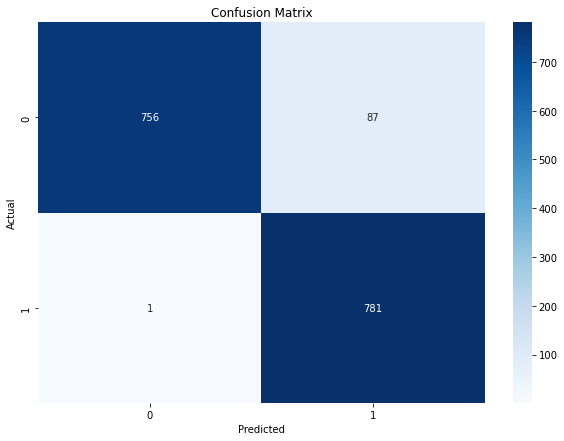

In [20]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


##### Trying some tuning...
##### Tuning the hyperparameters made this decision tree works 100% safely! No unsafe mushrooms are included in the 'safe' classification and only 50 safe mushrooms are mistakenly classified as 'unsafe', this is a small waste of mushrooms but a safer situation for humans. 

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


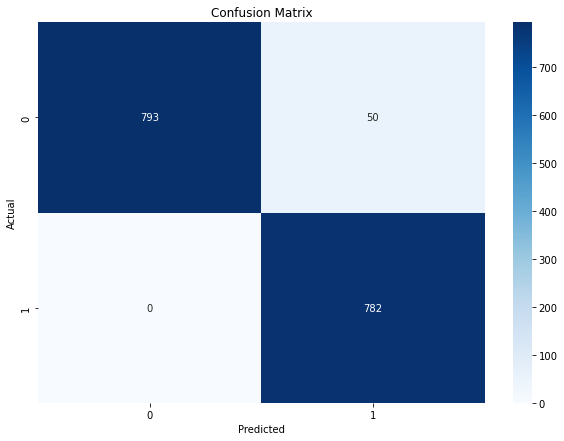

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

clf = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters:", best_params)

y_pred = best_estimator.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

#plt.savefig('conf_plot.jpg', format='jpg', dpi=80)
plt.show()

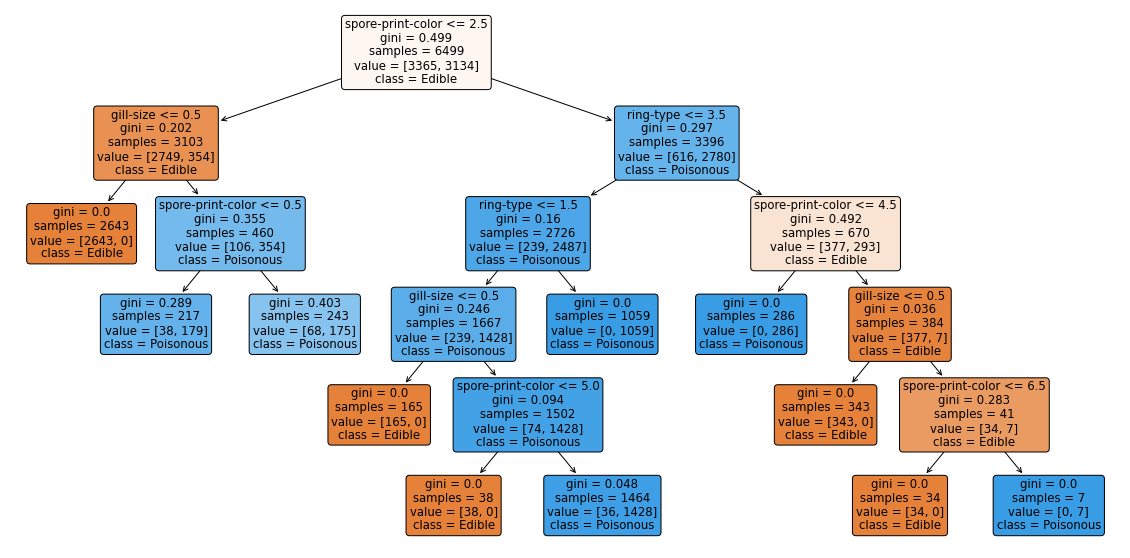

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = ['spore-print-color','gill-size','ring-type']  

plt.figure(figsize=(20,10))
plot_tree(best_estimator, filled=True, feature_names=feature_names, class_names=['Edible','Poisonous'], rounded=True)
#plt.savefig('tree_plot.jpg', format='jpg', dpi=80)
plt.show()